<a href="https://colab.research.google.com/github/RummanAli/FYP2022-KnowledgeVision/blob/main/g1020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dfki.uni-kl.de/~kieni/SDS-Info/G1020/G1020_dataset.tar

--2022-02-26 07:09:01--  https://www.dfki.uni-kl.de/~kieni/SDS-Info/G1020/G1020_dataset.tar
Resolving www.dfki.uni-kl.de (www.dfki.uni-kl.de)... 131.246.195.10
Connecting to www.dfki.uni-kl.de (www.dfki.uni-kl.de)|131.246.195.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1097390080 (1.0G) [application/x-tar]
Saving to: ‘G1020_dataset.tar’

G1020_dataset.tar   100%[===================>]   1.02G  3.17MB/s    in 5m 58s  

2022-02-26 07:15:00 (2.92 MB/s) - ‘G1020_dataset.tar’ saved [1097390080/1097390080]



In [ ]:
!tar -xvf /content/G1020_dataset.tar

G1020/
G1020/image_170.jpg
G1020/image_3138.jpg
G1020/image_1480.json
G1020/image_2319.jpg
G1020/image_2527.json
G1020/image_1767.json
G1020/image_2408.json
G1020/image_1197.json
G1020/image_498.jpg
G1020/image_1422.jpg
G1020/image_2154.json
G1020/image_2290.jpg
G1020/image_2030.json
G1020/image_2945.jpg
G1020/image_2156.jpg
G1020/image_1270.json
G1020/image_1092.jpg
G1020/image_236.json
G1020/image_3144.jpg
G1020/image_2365.jpg
G1020/image_3000.json
G1020/image_3164.json
G1020/image_1270.jpg
G1020/image_2413.jpg
G1020/image_2861.jpg
G1020/image_2211.json
G1020/image_2375.json
G1020/image_896.jpg
G1020/image_1422.json
G1020/image_1798.jpg
G1020/image_2662.json
G1020/image_1328.jpg
G1020/image_2703.jpg
G1020/image_3143.jpg
G1020/image_1616.jpg
G1020/image_1387.json
G1020/image_2362.jpg
G1020/image_2220.json
G1020/image_2414.jpg
G1020/image_1160.jpg
G1020/image_2737.json
G1020/image_1940.json
G1020/image_1824.json
G1020/image_1413.json
G1020/image_840.jpg
G1020/image_964.jpg
G1020/image_

# Saving KNowledge

**Saving Knowledge**

In [ ]:
from torchvision.models import Inception3
import torch
import numpy as np
import os
from PIL import Image
def save_knowledge():
  v3 = Inception3(2,init_weights=True)
  state_dict = torch.load('/content/drive/MyDrive/bestmodel.pth')
  v3.load_state_dict(state_dict['model'])

  data_path = '/content/drive/MyDrive/g1020-polygons'
  for images in df['imageID']:
    image_path = os.path.join(data_path,images[:-4]+'.png')
    img = Image.open(image_path)
    img.load()

    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask = img.split()[3])
    background.save("sample_2.jpg", "JPEG", quality=100)


    img = background.resize((299, 299), Image.ANTIALIAS)
    img = np.expand_dims(np.array(img),axis = 0)
    img = np.reshape(img,(1,3,299,299))
    img = torch.tensor(img)
    v3.eval()
    out = np.array(v3(img.float()).detach().cpu().numpy())
    np.save('/content/drive/MyDrive/knowledge_g1020_best/' + images[:-4],out,allow_pickle=True)

In [ ]:
save_knowledge()

# Saving knowledge keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

In [ ]:
teacher = tf.keras.models.load_model('drive/MyDrive/inceptionv3-G1020')
data_path = '/content/G1020'

In [ ]:
outputs = []
for images,label in zip(df['imageID'][:],df['binaryLabels'][:]):
  image_path = os.path.join(data_path,images)
  img = Image.open(image_path)
  img = img.resize((299, 299), Image.ANTIALIAS)
  img = np.expand_dims(np.array(img),axis = 0)
  pred = teacher(img)
  pred = np.argmax(pred)
  np.save('/content/drive/MyDrive/knowledge_g1020_best/' + images[:-4],pred,allow_pickle=True)

# Evaluation

In [ ]:
from torchvision.models import Inception3
from fastai.vision import *
def load_model():
  v3 = Inception3(2,init_weights=True)
  state_dict = torch.load('/content/drive/MyDrive/bestmodel.pth')
  v3.load_state_dict(state_dict['model'])
  return v3

In [ ]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import matplotlib

In [ ]:
tfms = get_transforms(max_rotate=25, flip_vert=True)

In [ ]:
def get_outputs(v3):
  data_path = '/content/drive/MyDrive/g1020-polygons'
  outputs = []
  for images,label in zip(df['imageID'][:],df['binaryLabels'][:]):
    #print(images)
    image_path = os.path.join(data_path,images)
    img = open_image(image_path).apply_tfms(tfms[0], size=(299,299))
    img = image2np(img.data)
    img = (img - np.min(img))/(np.max(img) - np.min(img))
    img = np.expand_dims(np.array(img),axis = 0)
    img = np.reshape(img,(1,3,299,299))
    img = torch.tensor(img)
    v3.eval()
    out = torch.argmax(torch.exp(v3(img.float())))
    #out = torch.argmax(torch.exp(v3(img)))
    outputs.append(out)
  return outputs

In [ ]:
def get_outputs(v3):
  data_path = '/content/drive/MyDrive/g1020-polygons'
  outputs = []
  for images,label in zip(df['imageID'][900:1020],df['binaryLabels'][900:1020]):
    #print(images)
    image_path = os.path.join(data_path,images[:-4]+'.png')
    img = Image.open(image_path)
    img.load()
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask = img.split()[3])
    background.save("sample_2.jpg", "JPEG", quality=100)
    img = background.resize((299, 299), Image.ANTIALIAS)
    img = np.expand_dims(np.array(img),axis = 0)
    img = np.reshape(img,(1,3,299,299))
    v3.eval()
    img = torch.tensor(img)
    out = torch.argmax(torch.exp(v3(img.float())))
    #out = torch.argmax(torch.exp(v3(img)))
    outputs.append(out)
  return outputs

In [ ]:
outputs = get_outputs(load_model())

# Our Model Accuracy

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(df['binaryLabels'][900:],outputs))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        84
           1       1.00      0.03      0.05        36

    accuracy                           0.71       120
   macro avg       0.85      0.51      0.44       120
weighted avg       0.79      0.71      0.60       120



**Given_Model_Accuracy**

# Given_Model_Accuracy

In [ ]:
print(classification_report(df['binaryLabels'][900:1020],outputs))

              precision    recall  f1-score   support

           0       0.68      0.20      0.31        84
           1       0.29      0.78      0.43        36

    accuracy                           0.38       120
   macro avg       0.49      0.49      0.37       120
weighted avg       0.56      0.38      0.35       120



# Results

In [ ]:
print(classification_report(df['binaryLabels'][180:360],outputs))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67       137
           1       0.28      0.51      0.36        43

    accuracy                           0.57       180
   macro avg       0.54      0.55      0.52       180
weighted avg       0.67      0.57      0.60       180



In [ ]:
print(classification_report(df['binaryLabels'][360:540],outputs))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       116
           1       0.42      0.53      0.47        64

    accuracy                           0.57       180
   macro avg       0.56      0.56      0.56       180
weighted avg       0.60      0.57      0.58       180



In [ ]:
print(classification_report(df['binaryLabels'][540:720],outputs))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       111
           1       0.39      0.45      0.42        69

    accuracy                           0.52       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.53      0.52      0.52       180



In [ ]:
print(classification_report(df['binaryLabels'][:],outputs))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       724
           1       0.00      0.00      0.00       296

    accuracy                           0.71      1020
   macro avg       0.35      0.50      0.42      1020
weighted avg       0.50      0.71      0.59      1020



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training Section - Pre-Trained Model

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/g1020-polygons/G1020.csv')
partition = {'train': [],'validation' : []}
for i in range(900):
  partition['train'].append(df['imageID'][i])
for i in range(900,1020):
  partition['validation'].append(df['imageID'][i])
labels = dict((val, out ) for val,out in zip(df['imageID'],df['binaryLabels']))

In [ ]:
import numpy as np
import keras
import tensorflow
class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=1, dim=(299,299), n_channels=3,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.array(Image.open('/content/G1020/' + ID).resize((299, 299), Image.ANTIALIAS))

            # Store class
            y[i] = self.labels[ID]

        return X, tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
def pre_trained_model():
    input = Input((299,299,3))
    c1l1  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(input)
    c1l2  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(c1l1)
    ces2  = Add()([c1l2, c1l1])
    c1l3  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(c1l2)
    ces3  = Add()([c1l3, ces2])
    ces3  = Flatten()(c1l3)
    ces3  = Dense(2)(ces3)
    ces3  = Activation('softmax')(ces3)
    return Model(inputs=input, outputs=ces3)

In [ ]:
training_generator = DataGenerator(partition['train'], labels)
validation_generator = DataGenerator(partition['validation'], labels)

In [ ]:
opt_rms = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
pretrained_model = pre_trained_model()
pretrained_model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = pretrained_model.fit_generator(training_generator,validation_data=validation_generator,epochs = 50)

In [ ]:
pretrained_model = tf.keras.models.save_model(pretrained_model,'drive/MyDrive/G1020_pretrained')

# Incorporating Knowledge

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
pretrained_model = tf.keras.models.load_model('/content/drive/MyDrive/G1020_pretrained')

In [ ]:
import numpy as np
import keras
import tensorflow
class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=8, dim=(299,299), n_channels=3,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        k = np.empty((self.batch_size,2))
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = np.array(Image.open('/content/G1020/' + ID).resize((299, 299), Image.ANTIALIAS))

            # Store class
            y[i] = self.labels[ID]
            #print('/content/drive/MyDrive/knowledge_g1020_best/'+str(ID[:-4])+'.npy')
            k[i] = np.load('/content/drive/MyDrive/knowledge_g1020_best/'+str(ID[:-4])+'.npy',allow_pickle= True)

        return [X,k], tensorflow.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
def knowledge_incorporated_model(pretrained_model):    
    input = Input((299,299,3))
    inputB = Input((2))
    inputB = Activation('softmax')(inputB)
    l1    = pretrained_model(input)
    l1    = Dense(2)(l1)
    l2    = Activation('sigmoid')(l1)
    l3    = Add()([l2,inputB])
    l4    = Dense(128)(l3)
    l5    = Activation('relu')(l4)
    l6    = Dense(2)(l5)
    l7    = Activation('sigmoid')(l6)
    l8    = Add()([l7,inputB])
    l9    = Activation('softmax')(l8)
    return Model(inputs=[input, inputB], outputs=l9)

In [ ]:
training_generator_final = DataGenerator(partition['train'], labels)
validation_generator_final = DataGenerator(partition['validation'], labels)

In [ ]:
opt_rms = tf.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
final_model = knowledge_incorporated_model(pretrained_model)
final_model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history_final = final_model.fit_generator(training_generator_final,validation_data=validation_generator_final,epochs = 50,class_weight={0: 0.30, 1: 0.70})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/50
112/112 [==============================] - 188s 2s/step - loss: 0.2889 - accuracy: 0.6350 - val_loss: 0.6841 - val_accuracy: 0.7000
Epoch 2/50
112/112 [==============================] - 183s 2s/step - loss: 0.2882 - accuracy: 0.6752 - val_loss: 0.6820 - val_accuracy: 0.7000
Epoch 3/50
112/112 [==============================] - 187s 2s/step - loss: 0.2890 - accuracy: 0.6496 - val_loss: 0.6825 - val_accuracy: 0.7000
Epoch 4/50
112/112 [==============================] - 185s 2s/step - loss: 0.2879 - accuracy: 0.7132 - val_loss: 0.6825 - val_accuracy: 0.7000
Epoch 5/50
112/112 [==============================] - 188s 2s/step - loss: 0.2887 - accuracy: 0.6741 - val_loss: 0.6846 - val_accuracy: 0.7000
Epoch 6/50
112/112 [==============================] - 187s 2s/step - loss: 0.2881 - accuracy: 0.7042 - val_loss: 0.6795 - val_accuracy: 0.7000
Epoch 7/50
112/112 [==============================] - 185s 2s/step - loss: 0.2886 - accuracy: 0.6920 - val_loss: 0.6758 - val_accuracy: 0.7000

In [ ]:

tf.keras.models.save_model(final_model,'drive/MyDrive/G1020_knowledge_incorporated3')

# Personally trained Inceptionv3 250-250

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
import pandas as pd
df = pd.read_csv('/content/G1020/G1020.csv')
partition = {'train': [],'validation' : []}
counth = 0
countg = 0
for i in range(1020):
  if(df['binaryLabels'][i] == 1 and countg is not 250):
    partition['train'].append(df['imageID'][i])
    countg += 1
  elif(df['binaryLabels'][i] == 0 and counth is not 250):
    partition['train'].append(df['imageID'][i])
    counth+= 1
  else:
    partition['validation'].append(df['imageID'][i])
labels = dict((val, out) for val,out in zip(df['imageID'],df['binaryLabels']) )

In [ ]:
import pandas as pd
df = pd.read_csv('/content/G1020/G1020.csv')
partition = {'train': [],'validation' : []}
counth = 0
countg = 0
counth2 = 0
countg2 = 0
for i in range(1020):
  if(df['binaryLabels'][i] == 1 and countg is not 250):
    partition['train'].append(df['imageID'][i])
    countg += 1
  elif(df['binaryLabels'][i] == 0 and counth is not 250):
    partition['train'].append(df['imageID'][i])
    counth+= 1
  else:
    if(df['binaryLabels'][i] == 1 and countg2 is not 40):
      partition['validation'].append(df['imageID'][i])
      countg2 +=1
    elif(df['binaryLabels'][i] == 0 and counth2 is not 40):
      partition['validation'].append(df['imageID'][i])
      counth2 +=1
labels = dict((val, out) for val,out in zip(df['imageID'],df['binaryLabels']) )

In [ ]:
len(partition['validation'])

80

In [ ]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=8, dim=(299,299), n_channels=3,
                 n_classes=2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = preprocess_input(np.array(Image.open('/content/G1020/' + ID).resize((299, 299), Image.ANTIALIAS)))

            # Store class
            y[i] = self.labels[ID]
        return X, to_categorical(y, num_classes=self.n_classes)

In [ ]:
training_generator = DataGenerator(partition['train'], labels)
validation_generator = DataGenerator(partition['validation'], labels)

In [ ]:
v3 = tf.keras.applications.InceptionV3(include_top=False,weights=None,input_shape=(299,299,3),classes=2,classifier_activation="softmax")
f = Flatten()(v3.output)
d = Dense(2,activation = "softmax")(f)
model = Model(inputs=v3.input, outputs=d)
opt_rms = RMSprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history = model.fit_generator(training_generator,validation_data=validation_generator,epochs = 50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
62/62 [==============================] - 213s 3s/step - loss: 12.2062 - accuracy: 0.4940 - val_loss: 24982.1406 - val_accuracy: 0.9115
Epoch 2/50
62/62 [==============================] - 192s 3s/step - loss: 4.1048 - accuracy: 0.5403 - val_loss: 216.3065 - val_accuracy: 0.3308
Epoch 3/50
62/62 [==============================] - 191s 3s/step - loss: 1.9669 - accuracy: 0.5081 - val_loss: 81.9078 - val_accuracy: 0.4827
Epoch 4/50
62/62 [==============================] - 191s 3s/step - loss: 1.8074 - accuracy: 0.4879 - val_loss: 5.4078 - val_accuracy: 0.8750
Epoch 5/50
62/62 [==============================] - 191s 3s/step - loss: 1.0118 - accuracy: 0.5121 - val_loss: 10.9528 - val_accuracy: 0.0885
Epoch 6/50
62/62 [==============================] - 191s 3s/step - loss: 1.9963 - accuracy: 0.4980 - val_loss: 0.6239 - val_accuracy: 0.8846
Epoch 7/50
62/62 [==============================] - 192s 3s/step - loss: 1.7901 - accuracy: 0.4698 - val_loss: 0.3573 - val_accuracy: 0.9096
Epoc

In [ ]:
tf.keras.models.save_model(model,'drive/MyDrive/inceptionv3-G1020')

INFO:tensorflow:Assets written to: drive/MyDrive/inceptionv3-G1020/assets


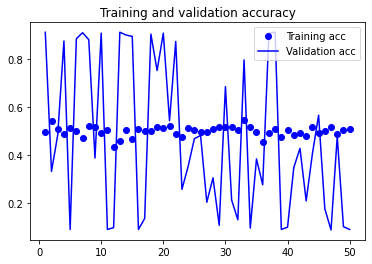

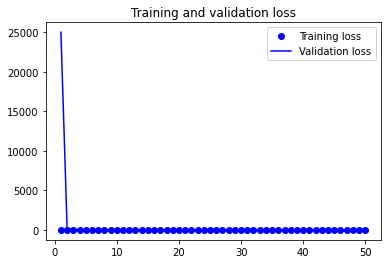

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(validation_generator,verbose = 2)

10/10 - 22s - loss: 0.6932 - accuracy: 0.5000 - 22s/epoch - 2s/step


[0.6931666731834412, 0.5]

# K-fold-Cross-Validation

In [ ]:
element , freq = np.unique(df['patientID'], return_counts=True)

In [ ]:
patient_labels = []
for x in df['patientID'].unique():
  patient_labels.append(labels2[x])


In [ ]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
skf = StratifiedKFold(n_splits=6, random_state=42, shuffle=True)
counter = 0
for train_index, val_index in skf.split(df['patientID'].unique(), patient_labels):
  counterg = 0
  for i in val_index:
    if (df['binaryLabels'][i] == 1):
      counterg+= 1
  print(counterg)
  

In [ ]:
val_index

In [ ]:
counterg = 0
for i in val_index:
  if (df['binaryLabels'][i] == 1):
    counterg+= 1
    print(df['patientID'][i]) # 3+2+2+4+2+3+2

In [ ]:
print(counter)

50


# Extracting Polygons

In [ ]:
import json
import os
for file in df['imageID']:
  f = open(os.path.join('/content/G1020',file[:-4]+'.json'))
  data = json.load(f)
  print(data['shapes'])